<b>Ejercicios 1, 2 y 3: </b> Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre los siguientes: árboles de decisión, k vecinos más cercanos, máquinas de vectores soporte y clasificador Naïve de Bayes. No use combinaciones (ensembles) de modelos que serán objeto de una práctica posterior.
<ul>
<li>Para cada uno de los problemas seleccionados realice las siguientes tareas:
<li>Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out.
<li>Ejecute para cada clasificador seleccionado el entrenamiento y anote el error.
<li>Represente gráficamente el error obtenido con cada uno de los métodos de clasificación.
</ul>
*El ejercicio 1 es descargar los datasets

Base de datos: contact-lenses.arff
Porcentaje de bien clasificados KNN:
0.7
Porcentaje de bien clasificados SVM
0.7
Porcentaje de bien clasificados arbol
0.9


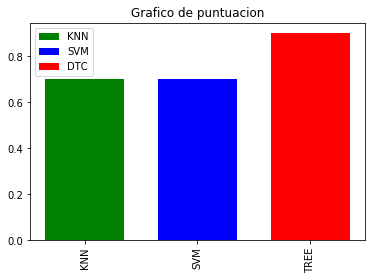

---------------------------
Base de datos: cpu.arff
Porcentaje de bien clasificados KNN:
0.03571428571428571
Porcentaje de bien clasificados SVM
0.023809523809523808
Porcentaje de bien clasificados arbol
0.047619047619047616


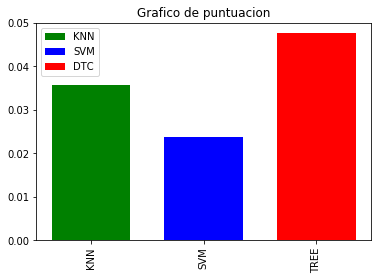

---------------------------
Base de datos: diabetes.arff
Porcentaje de bien clasificados KNN:
0.7402597402597403
Porcentaje de bien clasificados SVM
0.6818181818181818
Porcentaje de bien clasificados arbol
0.6883116883116883


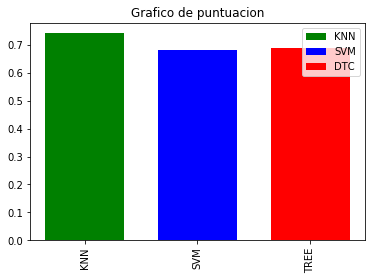

---------------------------
Base de datos: glass.arff
Porcentaje de bien clasificados KNN:
0.6627906976744186
Porcentaje de bien clasificados SVM
0.5813953488372093
Porcentaje de bien clasificados arbol
0.6627906976744186


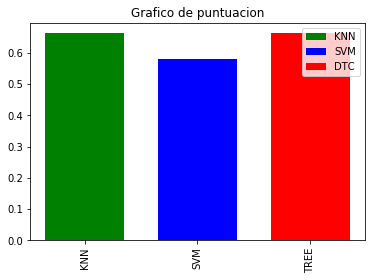

---------------------------
Base de datos: ionosphere.arff
Porcentaje de bien clasificados KNN:
0.8297872340425532
Porcentaje de bien clasificados SVM
0.9078014184397163
Porcentaje de bien clasificados arbol
0.8652482269503546


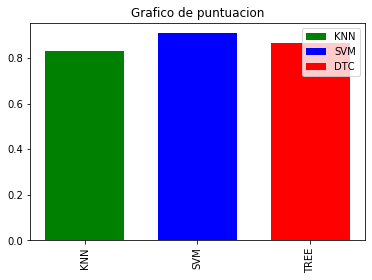

---------------------------
Base de datos: iris.arff
Porcentaje de bien clasificados KNN:
0.9666666666666667
Porcentaje de bien clasificados SVM
0.9666666666666667
Porcentaje de bien clasificados arbol
0.9166666666666666


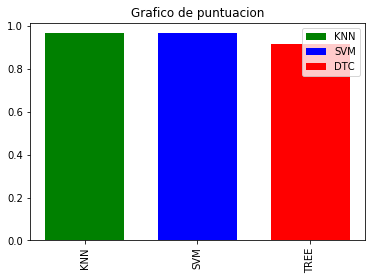

---------------------------
Base de datos: more_iris.arff
Porcentaje de bien clasificados KNN:
0.9333333333333333
Porcentaje de bien clasificados SVM
0.95
Porcentaje de bien clasificados arbol
0.9166666666666666


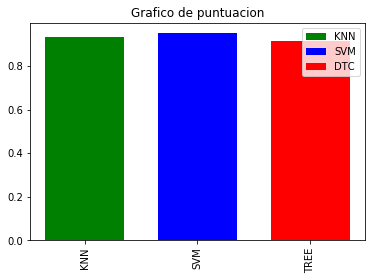

---------------------------
Base de datos: segment-challenge.arff
Porcentaje de bien clasificados KNN:
0.915
Porcentaje de bien clasificados SVM
0.42
Porcentaje de bien clasificados arbol
0.9566666666666667


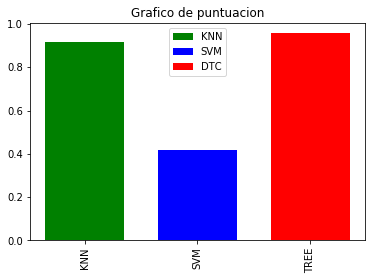

---------------------------
Base de datos: segment-test.arff
Porcentaje de bien clasificados KNN:
0.8703703703703703
Porcentaje de bien clasificados SVM
0.2716049382716049
Porcentaje de bien clasificados arbol
0.9259259259259259


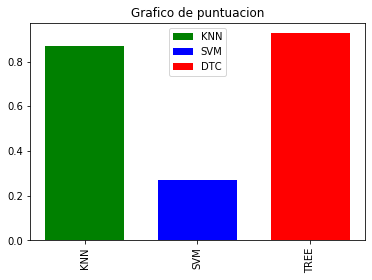

---------------------------
Base de datos: weather.arff
Porcentaje de bien clasificados KNN:
0.6666666666666666
Porcentaje de bien clasificados SVM
0.6666666666666666
Porcentaje de bien clasificados arbol
0.3333333333333333


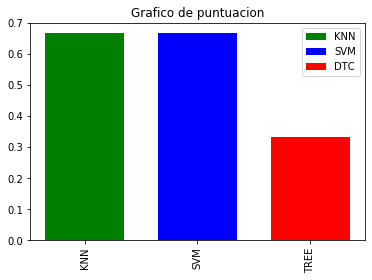

---------------------------


In [6]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from scipy.stats import wilcoxon
from os import listdir
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
from scipy.stats import f
import matplotlib.pyplot as plt

datasets=listdir('./datasets')

for i in datasets:

    print('Base de datos: ' + str(i))
    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)

    # Llamada y entrenamiento del algoritmo KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados KNN:')
    print(knn.score(X_test, Y_test))
    
    # llamada y entrenamiento algoritmo SVM
    svm = SVC(gamma='auto')
    svm.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM')
    print(svm.score(X_test, Y_test))

    # llamada y entrenamiento del arbol de decision
    arbol = DecisionTreeClassifier()
    arbol = arbol.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados arbol')
    print(arbol.score(X_test, Y_test))
    
    #Representación
    fig = plt.figure(u'Gráfica de barras')  # Figure
    ax = fig.add_subplot(111)  # Axes
    plt.bar('KNN',knn.score(X_test, Y_test) , color='g', width=0.7, align='center')
    plt.bar('SVM', svm.score(X_test, Y_test), color='b', width=0.7, align='center')
    plt.bar('TREE', arbol.score(X_test, Y_test), color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title('Grafico de puntuacion')
    plt.show()
    
    
    print('---------------------------')

<b>Respuesta: </b> Se ha elegido un método de Hold Out que se aplicará con la función train_test_split(), los conjuntos de train y test resultantes se pasarán a los siguientes clasificadores:
<ul>
    <li> KNN.
    <li> SVM.
    <li> Árbol de decisión.
</ul>

Observando las gráficas podemos ver que los clasificadores funcionan bastante bien con algunas excepciones, por ejemplo la base de datos cpu no logra una buena puntuación que las salidas requieren un preprocesamiento prévio, puesto que se deben especificar en rangos. Por otro lado el SVM ofrece en ocasiones malos resultados, esto puede suceder debido a que se ha dejado el parámetro C por defecto, que tiene un valor de 1.0. Este parámetro especifica la permisividad del error y por ese motivo en algunos dataset necesita ser aumentado, ya que además utiliza por defecto un kernel no lineal RBF. Pero también tenemos que tener en cuenta que si este parámetro se aumenta, existe la posibilidad de sobreentrenamiento en otros datasets. Al final, KNN y TREE han dado buenos resultados casi siempre.

<b>Ejercio 4: </b>Use el test de Wilcoxon de comparación de dos algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el rango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores

Test de Wilcoxon para SVM y KNN de todos los datasets
WilcoxonResult(statistic=12.0, pvalue=0.11365821697739432)
Rango de Friedman KNN


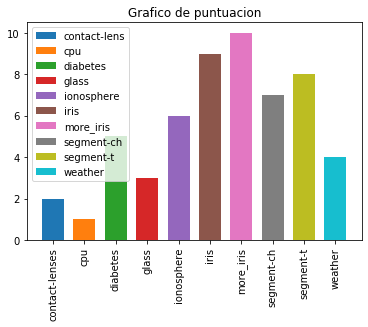

Rango de Friedman SVM


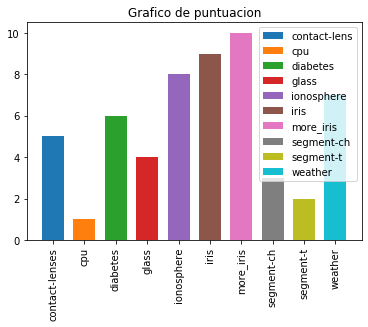

Rango de Friedman TREE


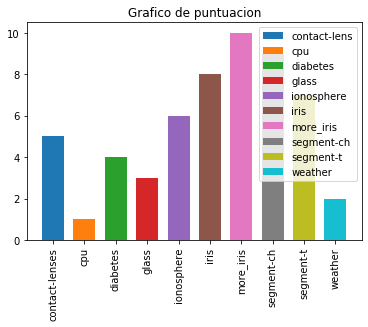

Test de Iman Davenport
3.044609665427519


In [11]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from scipy.stats import wilcoxon
from os import listdir
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
from scipy.stats import f


#ejecutar con python2.7

datasets=listdir('./datasets')

scoreWilKNN=[]
scoreWilSVM=[]
scoreWilTREE=[]

for i in datasets:

    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)

    # Llamada y entrenamiento del algoritmo KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    scoreWilKNN.append(knn.score(X_test, Y_test))

    # llamada y entrenamiento algoritmo SVM
    svm = SVC(gamma='auto')
    svm.fit(X_train, Y_train)
    scoreWilSVM.append(svm.score(X_test, Y_test))

    # llamada y entrenamiento del arbol de decision
    arbol = DecisionTreeClassifier()
    arbol = arbol.fit(X_train, Y_train)
    scoreWilTREE.append(arbol.score(X_test, Y_test))

print('Test de Wilcoxon para SVM y KNN de todos los datasets')
print(wilcoxon(x=scoreWilKNN, y=scoreWilSVM, zero_method='zsplit', correction=False))

print('Rango de Friedman KNN')
ranking=rankdata(scoreWilKNN)
fig = plt.figure(u'Gráfica de barras')  # Figure
ax = fig.add_subplot(111)  # Axes
plt.bar('contact-lenses',ranking[0] , width=0.7, align='center')
plt.bar('cpu', ranking[1],  width=0.7, align='center')
plt.bar('diabetes', ranking[2], width=0.7, align='center')
plt.bar('glass', ranking[3], width=0.7, align='center')
plt.bar('ionosphere', ranking[4], width=0.7, align='center')
plt.bar('iris', ranking[5], width=0.7, align='center')
plt.bar('more_iris', ranking[6], width=0.7, align='center')
plt.bar('segment-ch', ranking[7], width=0.7, align='center')
plt.bar('segment-t', ranking[8], width=0.7, align='center')
plt.bar('weather', ranking[9], width=0.7, align='center')
plt.xticks(rotation='vertical')
plt.legend(['contact-lens', 'cpu', 'diabetes','glass','ionosphere','iris','more_iris','segment-ch','segment-t','weather'])
plt.title('Grafico de puntuacion')
plt.show()

print('Rango de Friedman SVM')
ranking=rankdata(scoreWilSVM)
fig = plt.figure(u'Gráfica de barras')  # Figure
ax = fig.add_subplot(111)  # Axes
plt.bar('contact-lenses',ranking[0] , width=0.7, align='center')
plt.bar('cpu', ranking[1],  width=0.7, align='center')
plt.bar('diabetes', ranking[2], width=0.7, align='center')
plt.bar('glass', ranking[3], width=0.7, align='center')
plt.bar('ionosphere', ranking[4], width=0.7, align='center')
plt.bar('iris', ranking[5], width=0.7, align='center')
plt.bar('more_iris', ranking[6], width=0.7, align='center')
plt.bar('segment-ch', ranking[7], width=0.7, align='center')
plt.bar('segment-t', ranking[8], width=0.7, align='center')
plt.bar('weather', ranking[9], width=0.7, align='center')
plt.xticks(rotation='vertical')
plt.legend(['contact-lens', 'cpu', 'diabetes','glass','ionosphere','iris','more_iris','segment-ch','segment-t','weather'])
plt.title('Grafico de puntuacion')
plt.show()

print('Rango de Friedman TREE')
ranking=rankdata(scoreWilTREE)
fig = plt.figure(u'Gráfica de barras')  # Figure
ax = fig.add_subplot(111)  # Axes
plt.bar('contact-lenses',ranking[0] , width=0.7, align='center')
plt.bar('cpu', ranking[1],  width=0.7, align='center')
plt.bar('diabetes', ranking[2], width=0.7, align='center')
plt.bar('glass', ranking[3], width=0.7, align='center')
plt.bar('ionosphere', ranking[4], width=0.7, align='center')
plt.bar('iris', ranking[5], width=0.7, align='center')
plt.bar('more_iris', ranking[6], width=0.7, align='center')
plt.bar('segment-ch', ranking[7], width=0.7, align='center')
plt.bar('segment-t', ranking[8], width=0.7, align='center')
plt.bar('weather', ranking[9], width=0.7, align='center')
plt.xticks(rotation='vertical')
plt.legend(['contact-lens', 'cpu', 'diabetes','glass','ionosphere','iris','more_iris','segment-ch','segment-t','weather'])
plt.title('Grafico de puntuacion')
plt.show()

print('Test de Iman Davenport')
nDatasets=10
kAlgoritms=3
chi=friedmanchisquare(scoreWilTREE,scoreWilSVM,scoreWilKNN)
F=((nDatasets-1)*chi[0])/(nDatasets*(kAlgoritms-1)-chi[0])
print(F)

<b>Respuesta: </b> </br>
El test de Wilcoxon nos dice lo parecidas que son dos muestras, para ello necesita un número concreto de datos (por eso el experimento se realiza con un mínimo de 10 datasets). En este caso se han utilizado los clasificadores KNN y SVM para la realización del experimento, lo que nos como resultado lo normalmente distribuidos que estos están.</br>
El rango de friedman nos dirá lo bien que se comporta cada clasificador con los datasets que tenemos. Lo cual tiende a coincidir con los resultados obtenidos en el ejercicio anterior.
